# Stiching

In [1]:
# Importa la función para la representación de las imágenes
import sys  
sys.path.insert(0, '../')

import resources as src

In [2]:
# Imágenes tomadas por la cámara
path1 = '../data/camara/imgn1.jpeg'
path2 = '../data/camara/imgn2.jpeg'
path3 = '../data/camara/imgn3.jpeg'

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imageio
import imutils
cv2.ocl.setUseOpenCL(False)

In [4]:
# Cargamos las imágenes obtenidas de la cámara en memoria
img1 = imageio.v2.imread(path1)
img2 = imageio.v2.imread(path2)
img3 = imageio.v2.imread(path3)

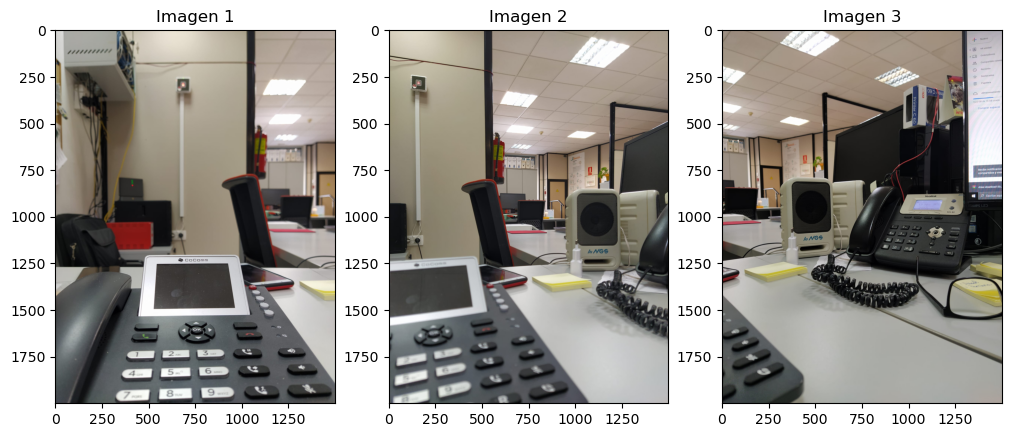

In [5]:
# Mostramos las imágenes tomadas con la cámara
src.mostrar_imagenes(1, 3, ['Imagen 1', 'Imagen 2', 'Imagen 3'], [img1, img2, img3], 10, 7, (False, False, False))

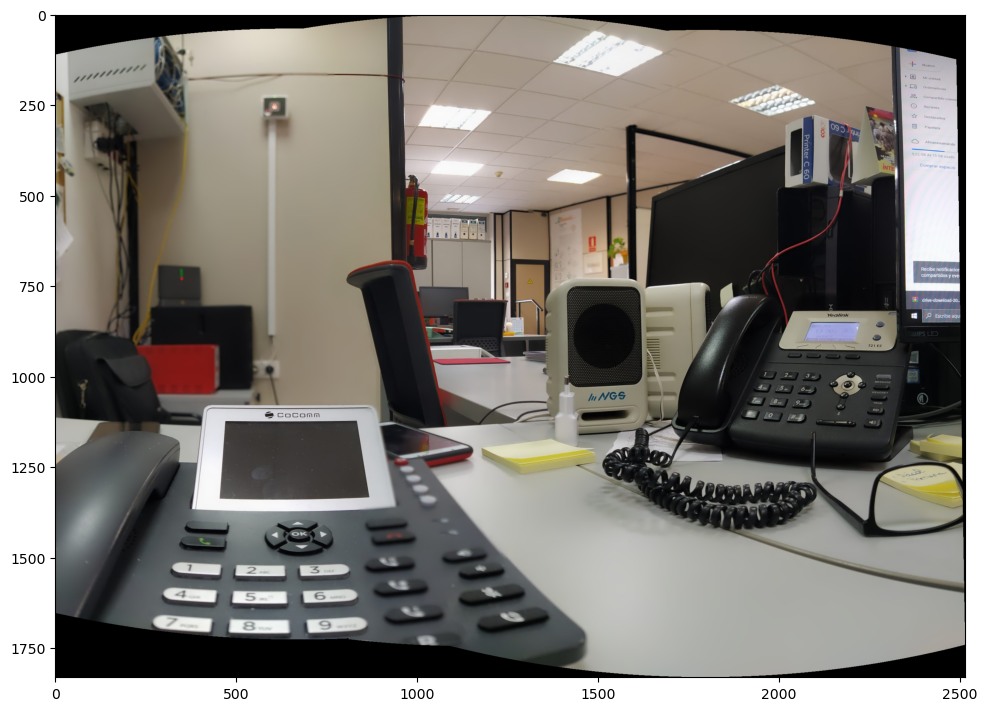

In [6]:
# Creamos un objeto Stitcher
stitcher = cv2.Stitcher.create()

# Realizamos el stiching de las imágenes
status, result = stitcher.stitch((img1, img2, img3))

# Comprobamos el estado devuelto por el método stitch()
if status == cv2.STITCHER_OK:
    # Guardar las imágenes con coincidencias en disco 
    result_rgb = cv2.cvtColor(result, cv2.COLOR_BGR2RGB)
    cv2.imwrite('stiching.png', result_rgb)
    # Mostramos el resultado
    src.mostrar_imagenes(1, 1, [''], [result], 10, 7, (False, 0))
elif status == cv2.STITCHER_ERR_NEED_MORE_IMGS:
    print("Se necesitan más imágenes para realizar el stiching")
elif status == cv2.STITCHER_ERR_HOMOGRAPHY_EST_FAIL:
    print("Error al calcular la homografía")
elif status == cv2.STITCHER_ERR_CAMERA_PARAMS_ADJUST_FAIL:
    print("Error al ajustar los parámetros de la cámara")
else:
    print("Error desconocido al realizar el stiching")